<a href="https://colab.research.google.com/github/ajayshgithub/Project-1/blob/main/Project_1_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1.name

2.year

3.selling_price

4.km_driven

5.fuel

6.seller_type

7.transmission

8.Owner

##Importing the Dependencies

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##Data Collection and Pre-Processing

Data Collection and Preprocessing: Gathered a comprehensive dataset containing information about various car features, including make, model, year, mileage, fuel type, and engine specifications. Conducted thorough data cleaning and preprocessing to ensure data quality.

In [2]:
#Mounting GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car data.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Feature Engineering: Engineered relevant input features, including categorical encoding, feature scaling, and handling missing values, to prepare the data for regression modeling.

Here, we have 3 categorical columns: Fuel_type, Seller_type, Transmission and car_name but we will drop the car_name column.

In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Encoding the Categorical Data

In [8]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [11]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [12]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#Model Training

Model Training and Evaluation: Split the dataset into training and testing sets to train and validate the selected regression model. Employed evaluation metrics R-squared to quantify the model's predictive accuracy.

Splitting Training and Test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

##1. Linear Regression

In [15]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [77]:
#Training our model

lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


Accuracy of the Model


In [19]:
#Training accuracy
lin_reg_model.score(X_train, Y_train)

0.8799451660493711

In [20]:
#Test accuracy
lin_reg_model.score(X_test, Y_test)

0.8365766715027051

In [21]:
#Actual training price
print(Y_train[0:1])

204    2.75
Name: Selling_Price, dtype: float64


In [22]:
#Predicted training Price
print(training_data_prediction[0:1])

[3.73088505]


Visualize the Actual prices and Predicted prices on Training DAtaset

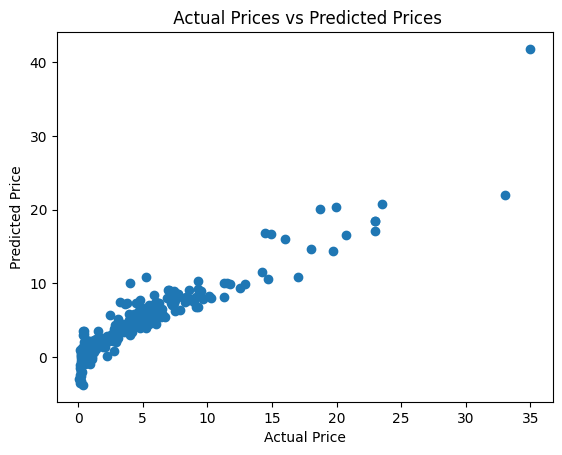

In [23]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [24]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [25]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


Visualize the Actual prices and Predicted prices on Test Dataset

In [26]:
#Actual test price
print(Y_test[0:1])

99    9.65
Name: Selling_Price, dtype: float64


In [27]:
#Predicted test price
print(test_data_prediction[0:1])

[10.32892855]


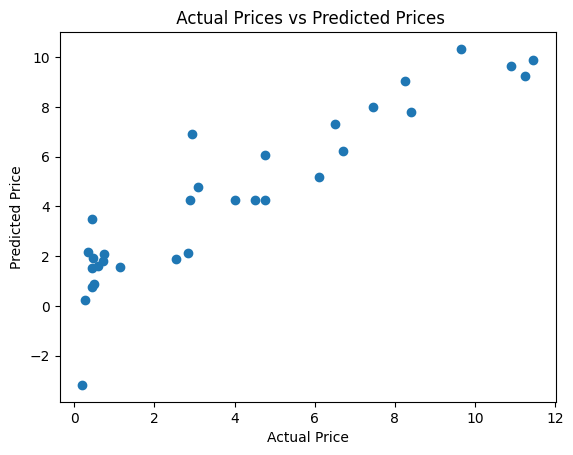

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
#Initializing the model
model_RF = RandomForestRegressor(n_estimators=5)

In [65]:
#Train the model
model_RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=5)

Accuracy of the model

In [66]:
#Training Accuracy
model_RF.score(X_train, Y_train)

0.9800861381611781

In [67]:
#Test Accuracy
model_RF.score(X_test, Y_test)

0.9686830975481077

Visualizing actual and predicted prices on training dataset

In [68]:
# prediction on Training data
training_data_prediction = model_RF.predict(X_train)

In [69]:
#Actual training price
print(Y_train[0])

3.35


In [70]:
#PRedicted training  price
print(training_data_prediction[0])

3.15


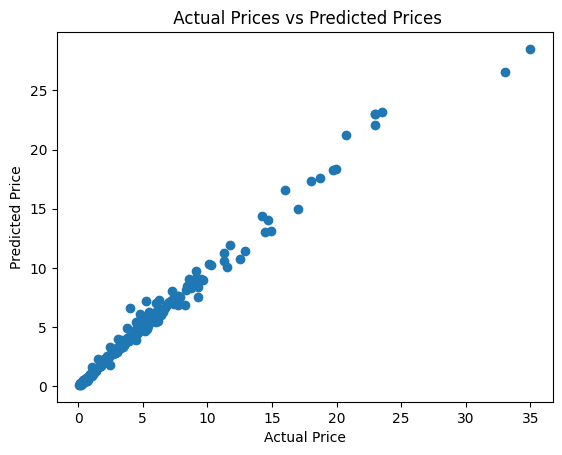

In [71]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Visualiziing actual vs predicted prices on test dataset

In [72]:
# prediction on Test data
test_data_prediction = model_RF.predict(X_test)

In [73]:
#Actual test price
print(Y_test[0:1])

99    9.65
Name: Selling_Price, dtype: float64


In [74]:
#Predicted test price
print(test_data_prediction[0:1])

[7.55]


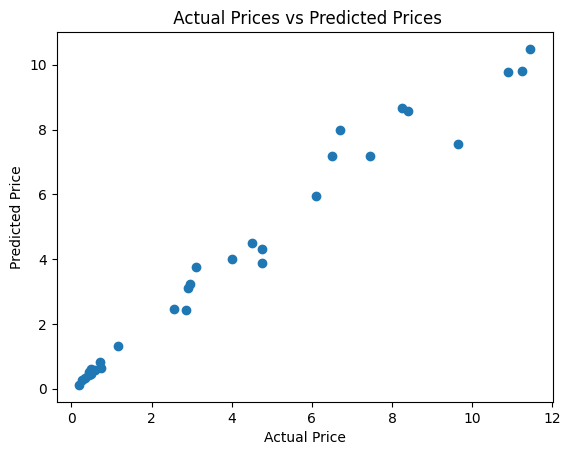

In [75]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

We've achieved pretty impressive Train and Test accuracy on RandomForest Regressor Model **(98 % and 96% respectively)**.